## A life-cycle consumption  model under objective/subjective risk perceptions
 - this notebook undertakes additional tests the source code
- author: Tao Wang
- date: March 2022
- this is a companion notebook to the paper "Perceived income risks"

In [1]:
import numpy as np
from interpolation import interp
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

In [2]:
## figure plotting configurations

mp.rc('xtick', labelsize=11) 
mp.rc('ytick', labelsize=11) 

mp.rc('legend',fontsize=11)
plt.rc('font',size=11) 

plt.style.use('seaborn')

## The Model Class and Solver

In [3]:
from SolveLifeCycle import LifeCycle, solve_model_backward_iter,compare_2solutions

## Initialize the model

In [4]:
if __name__ == "__main__":

    ## parameters 
    ###################

    U = 0.2 ## transitory ue risk
    U0 = 0.0 ## transitory ue risk
    unemp_insurance = 0.15
    sigma_psi = 0.1 # permanent 
    sigma_eps = 0.0 # transitory 


    #λ = 0.0  ## tax rate
    #λ_SS = 0.0 ## social tax rate
    #transfer = 0.0  ## transfer 
    #pension = 1.0 ## pension


    ## life cycle 

    T = 40
    L = 60
    TGPos = int(L/3) ## one third of life sees income growth 
    GPos = 1.01*np.ones(TGPos)
    GNeg= 0.99*np.ones(L-TGPos)
    #G = np.concatenate([GPos,GNeg])
    G = np.ones(L)
    YPath = np.cumprod(G)


    ## other parameters 

    ρ = 2
    R = 1.01
    β = 0.97
    x = 0.0
    theta = 0.0 ## extrapolation parameter 

    ## no persistent state
    b_y = 0.0

    ## wether to have zero borrowing constraint
    borrowing_cstr = True

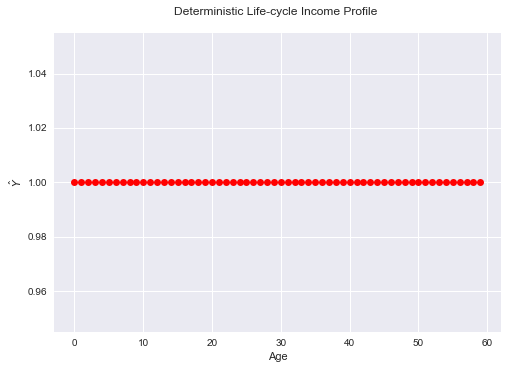

In [5]:
## a deterministic income profile 
if __name__ == "__main__":

    plt.title('Deterministic Life-cycle Income Profile \n')
    plt.plot(YPath,'ro')
    plt.xlabel('Age')
    plt.ylabel(r'$\hat Y$')

## Life-Cycle Problem 

### Consumption  the last period 

In [7]:
if __name__ == "__main__":
    lc_baseline = LifeCycle(sigma_psi = sigma_psi,
                   sigma_eps = sigma_eps,
                   U=U,
                   ρ=ρ,
                   R=R,
                   T=T,
                   L=L,
                   G=G,
                   β=β,
                   x=x,
                   borrowing_cstr = borrowing_cstr,
                   b_y= b_y,
                   unemp_insurance = unemp_insurance,
                   )

In [8]:
# Initial the end-of-period consumption policy of σ = consume all assets

if __name__ == "__main__":

    ## terminal consumption function

    m_init,σ_init = lc_baseline.terminal_solution()

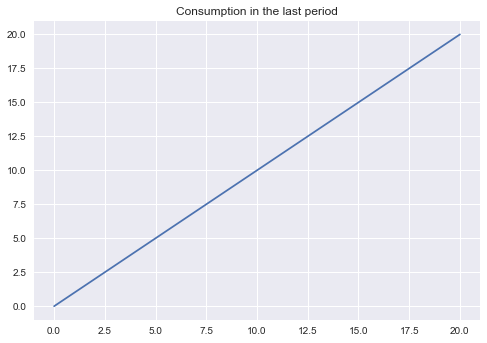

In [9]:
if __name__ == "__main__":

    plt.title('Consumption in the last period')
    plt.plot(m_init[:,0,0],
             σ_init[:,0,0])

## subjective (low risk) versus objective (high risk)

In [10]:
if __name__ == "__main__":

    from copy import copy
    from PrepareParameters import life_cycle_paras_y as lc_paras_Y
    ## make a copy of the imported parameters 
    lc_paras_y = copy(lc_paras_Y)
    lc_paras = lc_paras_y

In [11]:
if __name__ == "__main__":
    lc_obj = LifeCycle(
        ## primitives
                   ρ = lc_paras['ρ'],     ## relative risk aversion  
                   β = lc_paras['β'],     ## discount factor
                   borrowing_cstr = borrowing_cstr,
                   adjust_prob = 1.0,
        
        ## prices 
                   R = lc_paras['R'],           ## interest factor
                   W = lc_paras['W'],           ## Wage rate
        
        ## life cycle 
                   T = lc_paras['T'],
                   L = lc_paras['L'],
                   G = lc_paras['G'],
                   LivPrb = lc_paras['LivPrb'],       ## living probability 
        
        ## income risks 
                   x = 0.0,
                   b_y= 0.0,
                   sigma_psi = lc_paras['σ_ψ'],
                   sigma_eps = lc_paras['σ_θ'],
                   ue_markov = True,
                   P = lc_paras['P'],
                   U = lc_paras['U'],
                   z_val = lc_paras['z_val'], ## markov state from low to high 
                   sigma_psi_2mkv = lc_paras['σ_ψ_2mkv'],  ## permanent risks in 2 markov states
                   sigma_eps_2mkv = lc_paras['σ_θ_2mkv'],  ## transitory risks in 2 markov states
        
        ## initial conditions 
                    sigma_p_init = lc_paras['σ_ψ_init'],
                    init_b = lc_paras['init_b'],

        ## policy 
                   unemp_insurance = lc_paras['unemp_insurance'],
                   pension = lc_paras['pension'], ## pension
                   λ = lc_paras['λ'],  ## tax rate
                   λ_SS = lc_paras['λ_SS'], ## social tax rate
                   transfer = lc_paras['transfer'],  ## transfer 
                   bequest_ratio = lc_paras['bequest_ratio'],
         ## solutions 
                   shock_draw_size = 10.0,
                   grid_max = 10
                   )
    lc_sub = LifeCycle(
        ## primitives
                   ρ = lc_paras['ρ'],     ## relative risk aversion  
                   β = lc_paras['β'],     ## discount factor
                   borrowing_cstr = borrowing_cstr,
                   adjust_prob = 1.0,
        ## prices 
                   R = lc_paras['R'],           ## interest factor
                   W = lc_paras['W'],            ## Wage rate
        ## life cycle 
                   T = lc_paras['T'],
                   L = lc_paras['L'],
                   G = lc_paras['G'],
                   LivPrb = lc_paras['LivPrb'],       ## living probability 
        
        ## income risks 
                   x = 0.0,
                   b_y= 0.0,
                   sigma_psi = lc_paras['σ_ψ_sub'],
                   sigma_eps = lc_paras['σ_θ_sub'],
                   subjective = True,
                   ue_markov = True,
                   P = lc_paras['P'],
                   U = lc_paras['U'],
                   z_val = lc_paras['z_val'], ## markov state from low to high
                   sigma_psi_2mkv = lc_paras['σ_ψ_2mkv'],  ## permanent risks in 2 markov states
                   sigma_eps_2mkv = lc_paras['σ_θ_2mkv'],  ## transitory risks in 2 markov states
                   sigma_psi_true = lc_paras['σ_ψ'], ## true permanent
                   sigma_eps_true = lc_paras['σ_θ'], ## true transitory
        
        ## initial conditions 
                    sigma_p_init = lc_paras['σ_ψ_init'],
                    init_b = lc_paras['init_b'],

        ## policy 
                   unemp_insurance = lc_paras['unemp_insurance'],
                   pension = lc_paras['pension'], ## pension
                   λ = lc_paras['λ'],  ## tax rate
                   λ_SS = lc_paras['λ_SS'], ## social tax rate
                   transfer = lc_paras['transfer'],  ## transfer 
                   bequest_ratio = lc_paras['bequest_ratio'],
        ## solutions 
                  shock_draw_size =  10.0,
                  grid_max = 10
                   )
    
 
    models = [lc_sub,lc_obj]
    model_names = ['subjective','objective']

reminder: needs to give true risk parameters: sigma_psi_true & sigma_eps_true!


In [12]:
if __name__ == "__main__":
    
    t_start = time()
    
    ms_stars =[]
    σs_stars = []

    for i,model in enumerate(models):
        ## terminal solution
        m_init,σ_init = model.terminal_solution()

        ## solve backward
        ms_star, σs_star = solve_model_backward_iter(model,
                                                     m_init,
                                                     σ_init)
        ms_stars.append(ms_star)
        σs_stars.append(σs_star)


    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

at work age of 59
at work age of 58
at work age of 57
at work age of 56
at work age of 55
at work age of 54
at work age of 53
at work age of 52
at work age of 51
at work age of 50
at work age of 49
at work age of 48
at work age of 47
at work age of 46
at work age of 45
at work age of 44
at work age of 43
at work age of 42
at work age of 41
at work age of 40
at work age of 39
at work age of 38
at work age of 37
at work age of 36
at work age of 35
at work age of 34
at work age of 33
at work age of 32
at work age of 31
at work age of 30
at work age of 29
at work age of 28
at work age of 27
at work age of 26
at work age of 25
at work age of 24
at work age of 23
at work age of 22
at work age of 21
at work age of 20
at work age of 19
at work age of 18
at work age of 17
at work age of 16
at work age of 15
at work age of 14
at work age of 13
at work age of 12
at work age of 11
at work age of 10
at work age of 9
at work age of 8
at work age of 7
at work age of 6
at work age of 5
at work age of 

should be positive


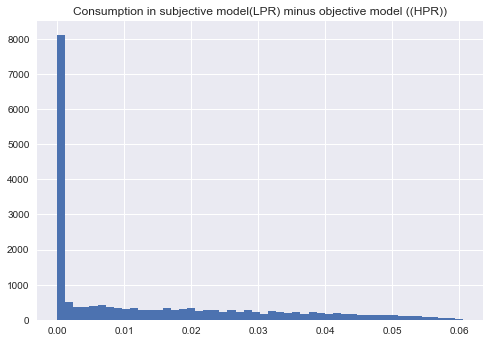

In [14]:
sub_minus_obj = compare_2solutions(ms_stars,
                                  σs_stars)

plt.hist(sub_minus_obj.flatten(),
         bins=50)
plt.title('Consumption in subjective model(LPR) minus objective model ((HPR))')
print('should be positive')

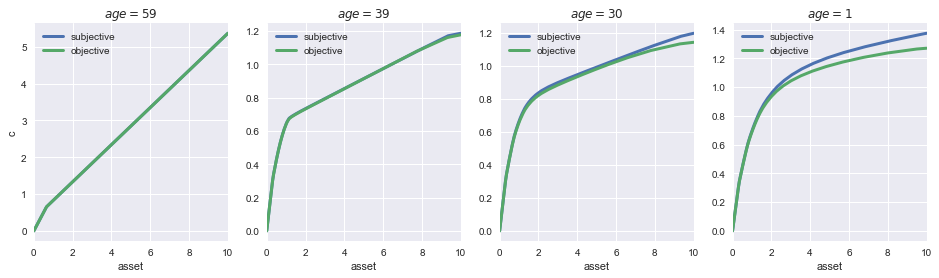

In [18]:
if __name__ == "__main__":

    m_grid = np.linspace(0.0,10.0,200)
    ## plot c func at different age /asset grid
    years_left = [1,21,30,59]

    n_sub = len(years_left)

    fig,axes = plt.subplots(1,n_sub,figsize=(4*n_sub,4))

    for x,year in enumerate(years_left):
        age = lc_baseline.L-year
        i = lc_baseline.L-age
        for k,model_name in enumerate(model_names):
            m_plt,c_plt = ms_stars[k][i,:,0,0],σs_stars[k][i,:,0,0]
            c_func = lambda m: interp(m_plt,c_plt,m)
            axes[x].plot(m_grid,
                         c_func(m_grid),
                         label = model_name,
                         lw = 3
                        )
        axes[x].legend()
        axes[x].set_xlim(0.0,np.max(m_grid))
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))

## low versus high risks 

In [21]:
if __name__ == "__main__":

    t_start = time()

    sigma_psi_ls = [lc_paras['σ_ψ_sub'],lc_paras['σ_ψ']]
    sigma_eps_ls = [lc_paras['σ_θ_sub'],lc_paras['σ_θ']]
    
    ms_stars =[]
    σs_stars = []
    
    for i,sigma_psi in enumerate(sigma_psi_ls):
        lc_baseline.sigma_psi = sigma_psi
        lc_baseline.sigma_eps = sigma_eps_ls[i]
        ### this line is very important!!!!
        #### need to regenerate shock draws for new sigmas
        lc_baseline.prepare_shocks()
        
        ## terminal solution
        m_init,σ_init = lc_baseline.terminal_solution()
        
        ## solve backward
        ms_star, σs_star = solve_model_backward_iter(lc_baseline,
                                                     m_init,
                                                     σ_init)
        ms_stars.append(ms_star)
        σs_stars.append(σs_star)


    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

at work age of 59
at work age of 58
at work age of 57
at work age of 56
at work age of 55
at work age of 54
at work age of 53
at work age of 52
at work age of 51
at work age of 50
at work age of 49
at work age of 48
at work age of 47
at work age of 46
at work age of 45
at work age of 44
at work age of 43
at work age of 42
at work age of 41
at work age of 40
at work age of 39
at work age of 38
at work age of 37
at work age of 36
at work age of 35
at work age of 34
at work age of 33
at work age of 32
at work age of 31
at work age of 30
at work age of 29
at work age of 28
at work age of 27
at work age of 26
at work age of 25
at work age of 24
at work age of 23
at work age of 22
at work age of 21
at work age of 20
at work age of 19
at work age of 18
at work age of 17
at work age of 16
at work age of 15
at work age of 14
at work age of 13
at work age of 12
at work age of 11
at work age of 10
at work age of 9
at work age of 8
at work age of 7
at work age of 6
at work age of 5
at work age of 

should be positive


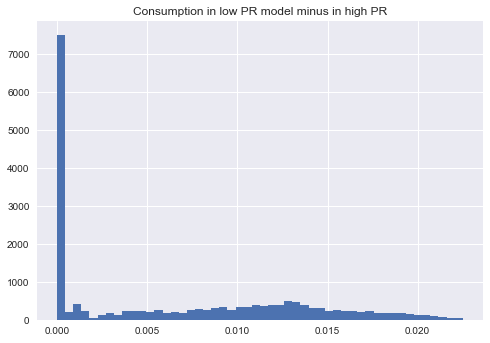

In [22]:
# compare solutions

sub_minus_obj = compare_2solutions(ms_stars,
                                  σs_stars)

plt.hist(sub_minus_obj.flatten(),
         bins=50)
plt.title('Consumption in low PR model minus in high PR')
print('should be positive')

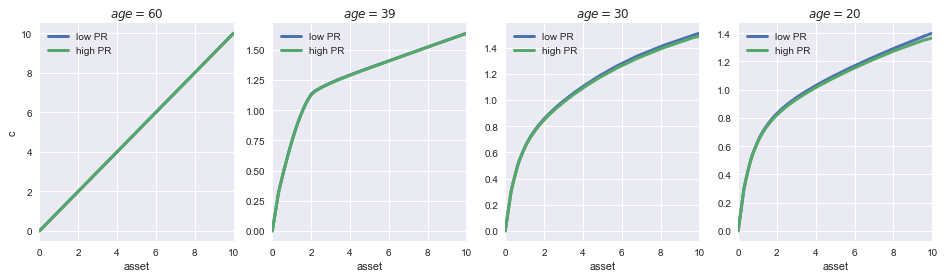

In [25]:
if __name__ == "__main__":

    m_grid = np.linspace(0.0,10.0,200)
    ## plot c func at different age /asset grid
    years_left = [0,21,30,40]

    n_sub = len(years_left)

    fig,axes = plt.subplots(1,n_sub,figsize=(4*n_sub,4))

    for x,year in enumerate(years_left):
        age = lc_baseline.L-year
        i = lc_baseline.L-age
        model_names = ['low PR','high PR']
        for k,model_name in enumerate(model_names):
            m_plt,c_plt = ms_stars[k][i,:,0,0],σs_stars[k][i,:,0,0]
            c_func = lambda m: interp(m_plt,c_plt,m)
            axes[x].plot(m_grid,
                         c_func(m_grid),
                         label = model_name,
                         lw=3
                        )
        axes[x].legend()
        axes[x].set_xlim(0.0,np.max(m_grid))
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))

## transitory UE risk as a special case of persistent UE





In [31]:
if __name__ == "__main__":
    
    U_prb = 0.2

    lc_trans_ue =  LifeCycle(sigma_psi = sigma_psi,
                       sigma_eps = sigma_eps,
                       U= U_prb,
                       ρ=ρ,
                       R=R,
                       T=T,
                       L=L,
                       G=G,
                       β=β,
                       x=x,
                       borrowing_cstr = borrowing_cstr,
                       b_y= b_y,
                       unemp_insurance = unemp_insurance
                       )

    lc_trans_mkv0 =  LifeCycle(sigma_psi = sigma_psi,
                       sigma_eps = sigma_eps,
                       U=U0,
                       ue_markov=True,
                       P= np.array([[U_prb,1-U_prb],[U_prb,1-U_prb]]),
                       ρ=ρ,
                       R=R,
                       T=T,
                       L=L,
                       G=G,
                       β=β,
                       x=x,
                       borrowing_cstr = borrowing_cstr,
                       b_y= b_y,
                       unemp_insurance = unemp_insurance
                       )


    models = [lc_trans_ue,lc_trans_mkv0] 
    model_names = ['transitory UE',
                  'markov UE:special case']

    t_start = time()

    ms_stars =[]
    σs_stars = []
    for i,model in enumerate(models):
        ## terminal solution
        m_init,σ_init = model.terminal_solution()
        #### need to regenerate shock draws for new sigmas
        ms_star, σs_star = solve_model_backward_iter(model,
                                                     m_init,
                                                     σ_init)
        ms_stars.append(ms_star)
        σs_stars.append(σs_star)


    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

at work age of 59
at work age of 58
at work age of 57
at work age of 56
at work age of 55
at work age of 54
at work age of 53
at work age of 52
at work age of 51
at work age of 50
at work age of 49
at work age of 48
at work age of 47
at work age of 46
at work age of 45
at work age of 44
at work age of 43
at work age of 42
at work age of 41
at work age of 40
at work age of 39
at work age of 38
at work age of 37
at work age of 36
at work age of 35
at work age of 34
at work age of 33
at work age of 32
at work age of 31
at work age of 30
at work age of 29
at work age of 28
at work age of 27
at work age of 26
at work age of 25
at work age of 24
at work age of 23
at work age of 22
at work age of 21
at work age of 20
at work age of 19
at work age of 18
at work age of 17
at work age of 16
at work age of 15
at work age of 14
at work age of 13
at work age of 12
at work age of 11
at work age of 10
at work age of 9
at work age of 8
at work age of 7
at work age of 6
at work age of 5
at work age of 

should be positive


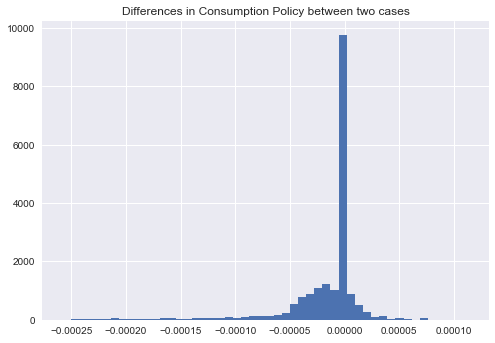

In [32]:
# compare solutions

trans_mkv_diff = compare_2solutions(ms_stars,
                                  σs_stars)

plt.hist(trans_mkv_diff.flatten(),
         bins=50)
plt.title('Differences in Consumption Policy between two cases')
print('should be positive')

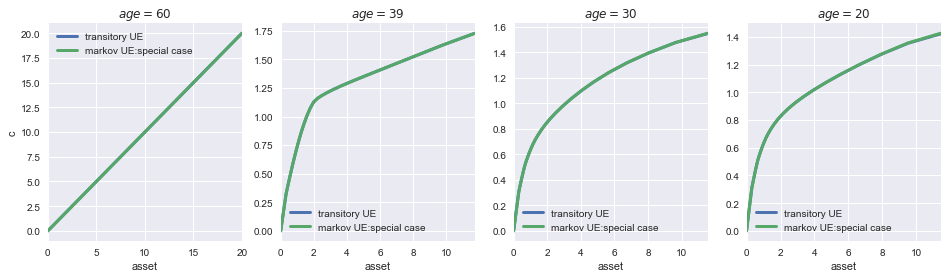

In [33]:
if __name__ == "__main__":


    ## plot c func at different age /asset grid
    years_left = [0,21,30,40]

    n_sub = len(years_left)

    fig,axes = plt.subplots(1,n_sub,figsize=(4*n_sub,4))

    for x,year in enumerate(years_left):
        age = lc_baseline.L-year
        i = lc_baseline.L-age
        for k,model_name in enumerate(model_names):
            m_plt,c_plt = ms_stars[k][i,:,0,0],σs_stars[k][i,:,0,0]
            axes[x].plot(m_plt,
                         c_plt,
                         label = model_name,
                         lw=3,
                        )
        axes[x].legend()
        axes[x].set_xlim(0.0,np.max(m_plt))
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))